In [1]:
import numpy as np

import pandas as pd

from scipy import interpolate
from scipy import integrate
import scipy.constants as ctte

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import matplotlib.cm as cm  # importación de mapa de colores
mycmap = cm.plasma



In [2]:
path = r'data/datos_G_ring_1_y_ring_4_new.csv'
df = pd.read_csv (path, sep= ';', skiprows = 4)


df.columns = ['B_1', 'gx_1', 'gy_1', 'B_2', 'gx_2', 'gy_2','B_3', 'gx_3', 'gy_3'] # rename columns
df.insert(0, "idx", np.linspace(0,len(df),len(df)), True) # add index column

# df_meas_prop has the measurement characteristics
df_meas_prop = pd.DataFrame({'meas_number': [5,5,4],
                             'ring_number': [4,1,1],
                             'frequency_Hz': [113.3,113.3,113.3],
                             'temp_K': [0.2588,0.2588,0.2598],
                             })


Utilizar N=2

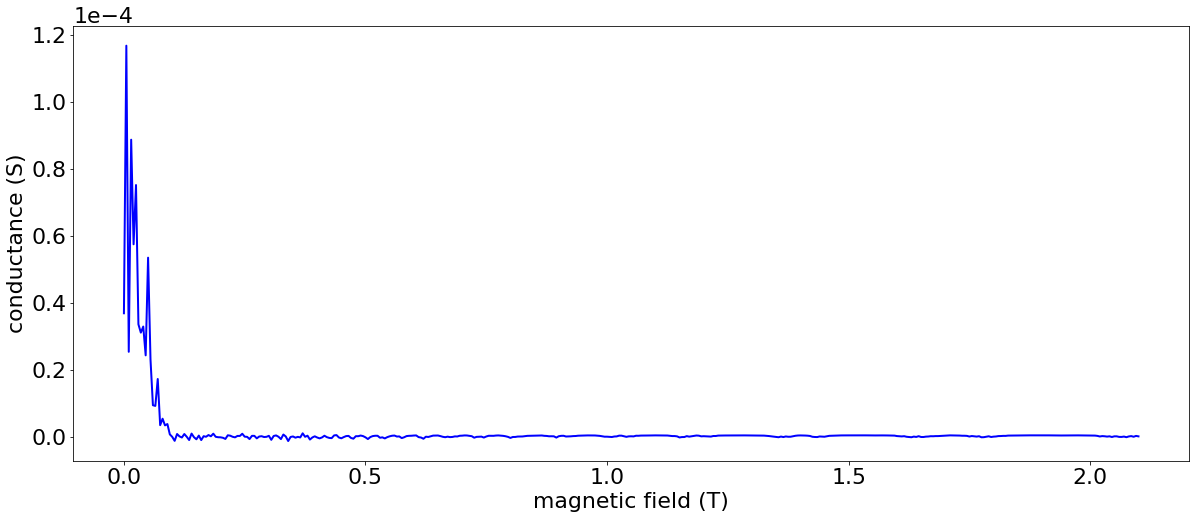

In [3]:
# Plotting
# ============================================================

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))



plt.plot(df.B_2, df.gx_2,
         color = 'blue',
         linewidth = 2)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('magnetic field (T)')
plt.ylabel(r'conductance (S)')
plt.show()

In [4]:

path = r'data/datos_G_ring_1_y_ring_4_new.csv'
df = pd.read_csv (path, sep= ';', skiprows = 4)
df.columns = ['B_1', 'gx_1', 'gy_1', 'B_2', 'gx_2', 'gy_2','B_3', 'gx_3', 'gy_3'] # rename columns
df.insert(0, "idx", np.linspace(0,len(df),len(df)), True) # add index column

# df_meas_prop has the measurement characteristics
df_meas_prop = pd.DataFrame({'meas_number': [5,5,4],
                             'ring_number': [4,1,1],
                             'frequency_Hz': [113.3,113.3,113.3],
                             'temp_K': [0.2588,0.2588,0.2598],
                             })


# monto otros archivos
path4 = r'data/datos_G_ring_4_temp0p261.csv'
df4 = pd.read_csv (path4, sep= ';', skiprows = 4)
df4.columns = ['B_4', 'gx_4', 'gy_4'] # rename columns
df4.insert(0, "idx", np.linspace(0,len(df4),len(df4)), True) # add index column

# df_meas_prop has the measurement characteristics
df4_meas_prop = pd.DataFrame({'meas_number': [7],
                             'ring_number': [4],
                             'frequency_Hz': [13.838],
                             'temp_K': [0.261],
                             })

path5 = r'data/datos_G_ring_1_temp0p6.csv'
df5 = pd.read_csv (path5, sep= ';', skiprows = 4)
df5.columns = ['B_5', 'gx_5', 'gy_5'] # rename columns
df5.insert(0, "idx", np.linspace(0,len(df5),len(df5)), True) # add index column

# df_meas_prop has the measurement characteristics
df5_meas_prop = pd.DataFrame({'meas_number': [3],
                             'ring_number': [1],
                             'frequency_Hz': [13.838],
                             'temp_K': [0.6065],
                             })

path6 = r'data/datos_G_ring_1_temp0p280.csv'
df6 = pd.read_csv (path6, sep= ';', skiprows = 4)
df6.columns = ['B_6', 'gx_6', 'gy_6'] # rename columns
df6.insert(0, "idx", np.linspace(0,len(df6),len(df6)), True) # add index column

# df_meas_prop has the measurement characteristics
df6_meas_prop = pd.DataFrame({'meas_number': [8],
                             'ring_number': [1],
                             'frequency_Hz': [13.838],
                             'temp_K': [0.280],
                             })

ctte_k = ctte.Boltzmann
ctte_e = ctte.elementary_charge
ctte_h = ctte.Planck
ctte_mu_0 = ctte.hbar * ctte_e / (2* ctte.electron_mass)
wc = ctte_e /(0.067 * ctte.electron_mass)
deltaE = wc* ctte.hbar
energy_0 = ctte.hbar * ctte_e  / (2 * 0.067 * ctte.electron_mass)
beta = 1/ctte.k
m_gaas = ctte.electron_mass * 0.067
ctte_G0 = ctte_e**2/ctte_h
alpha = (2* m_gaas)/(ctte.hbar * ctte_e * beta)

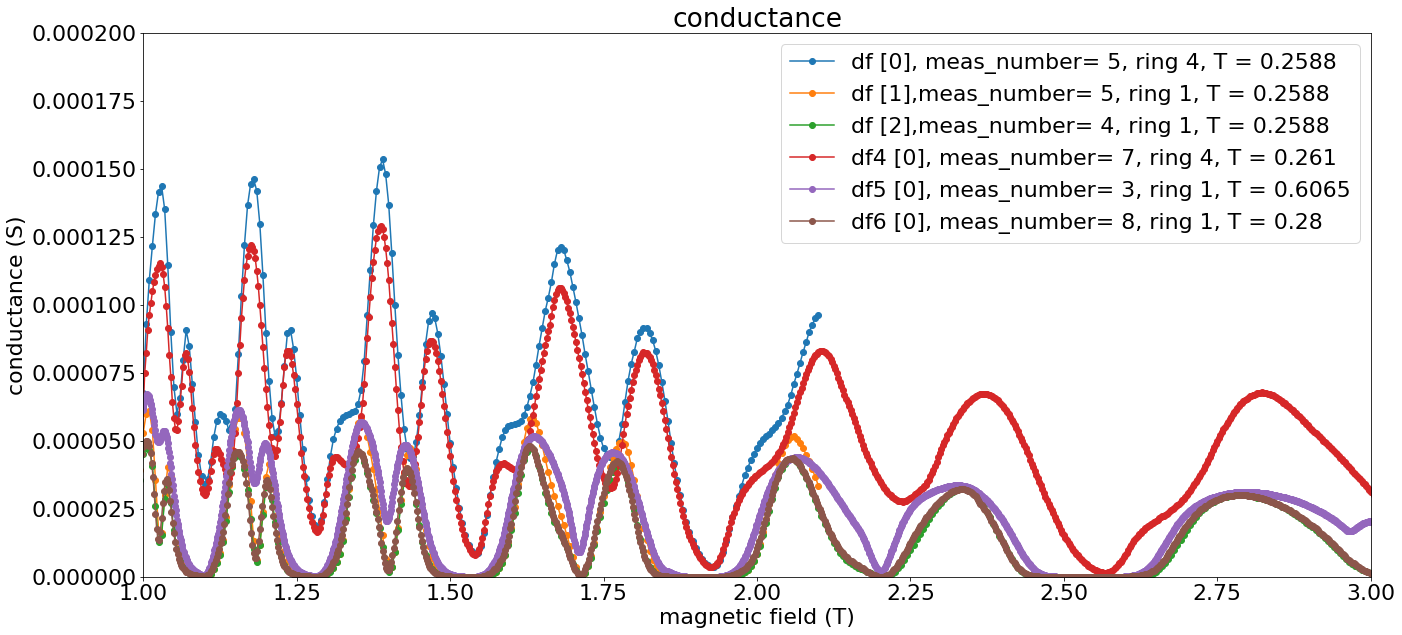

In [5]:
x1 = df.B_1.to_numpy()
x2 = df.B_2.to_numpy()
x3 = df.B_3.to_numpy()
x4 = df4.B_4.to_numpy()
x5 = df5.B_5.to_numpy()
x6 = df6.B_6.to_numpy()

y1 = -df.gy_1.to_numpy()/(ctte_G0) # transmission function as a function of B (T)
y2 = -df.gy_2.to_numpy()/(ctte_G0) # transmission function as a function of B (T)
y3 = df.gy_3.to_numpy()/(ctte_G0) # transmission function as a function of B (T)
y4 = df4.gx_4.to_numpy()/(ctte_G0) # transmission function as a function of B (T)
y5 = df5.gx_5.to_numpy()/(ctte_G0) # transmission function as a function of B (T)
y6 = df6.gx_6.to_numpy()/(ctte_G0) # transmission function as a function of B (T)

cy1 = -df.gy_1.to_numpy()
cy2 = -df.gy_2.to_numpy()
cy3 = df.gy_3.to_numpy()
cy4 = df4.gx_4.to_numpy()
cy5 = df5.gx_5.to_numpy()
cy6 = df6.gx_6.to_numpy()


plt.figure(figsize=(22, 10))
plt.plot(x1, cy1, 'o-', label='df [0], meas_number= {}, ring {}, T = {}'.format(df_meas_prop.meas_number.iloc[0],df_meas_prop.ring_number.iloc[0],df_meas_prop.temp_K.iloc[0] ))
plt.plot(x2, cy2, 'o-',label='df [1],meas_number= {}, ring {}, T = {}'.format(df_meas_prop.meas_number.iloc[1],df_meas_prop.ring_number.iloc[1],df_meas_prop.temp_K.iloc[0] ))
plt.plot(x3, cy3, 'o-',label='df [2],meas_number= {}, ring {}, T = {}'.format(df_meas_prop.meas_number.iloc[2],df_meas_prop.ring_number.iloc[2],df_meas_prop.temp_K.iloc[0] ))
plt.plot(x4, cy4, 'o-',label='df4 [0], meas_number= {}, ring {}, T = {}'.format(df4_meas_prop.meas_number.iloc[0],df4_meas_prop.ring_number.iloc[0],df4_meas_prop.temp_K.iloc[0] ))
plt.plot(x5, cy5, 'o-',label='df5 [0], meas_number= {}, ring {}, T = {}'.format(df5_meas_prop.meas_number.iloc[0],df5_meas_prop.ring_number.iloc[0],df5_meas_prop.temp_K.iloc[0] ))
plt.plot(x6, cy6, 'o-',label='df6 [0], meas_number= {}, ring {}, T = {}'.format(df6_meas_prop.meas_number.iloc[0],df6_meas_prop.ring_number.iloc[0],df6_meas_prop.temp_K.iloc[0] ))
plt.xlabel('magnetic field (T)')
plt.ylabel(r'conductance (S)')
plt.title('conductance')
plt.xlim(1,3)
plt.ylim(0,2e-4)
plt.legend()
plt.show()

## Modelando Capacidad

Lo que quiero hacer es modelar los valores de capacidad en los gaps y niveles de landau. Los valores de capacidad están asociados a las mediciones $G_y$ de conductncia.

Calculo la capacidad del corbino:

$$
C_{corbino} = \frac{1}{2 \pi f g_y - 1/C_{sistema}}
$$

Con $ C_{sistema} \sim 336 pF $ y $f = 113.330 Hz$. (Me fijé en el archivo)



Hago las cuentas devuelta:
    
$$
B = \frac{-X}{R^2 + X^2} =\frac{-1/2\pi f C}{R^2 + \frac{1}{(2\pi f C)^2}}\equiv g
$$

Simplifico (multiplico y divido por $(2 \pi f C )^2$)
$$
-\frac{1}{R^2 2 \pi f C +\frac{1}{2 \pi f C}} =  -\frac{2 \pi f C}{4 C^2 \pi^2 R^2 f^2+1} \\
 \Longrightarrow -\frac{2 \pi f C}{4 C^2 \pi^2 R^2 f^2+1}=g
$$
Multiplico ambos lados por $4 C^2 \pi^2 R^2 f^2+1$
$$
-2 \pi f C =g\left(4 C^2 \pi^2 R^2 f^2+1\right)
$$

Resuelvo 

$2 \pi f C+ g\left(4 C^2 \pi^2 R^2 f^2+1\right) = 0 $


\begin{array}{l}
C=\frac{-1+\sqrt{-4 R^2 g^2+1}}{4 \pi R^2 f g} \\
C=-\frac{\sqrt{-4 R^2 g^2+1}+1}{4 \pi R^2 f g}
\end{array}


Tomo la solución positiva de la capacidad y despejamos la capacidad del corbino en función de la del sistema utilizando la capacidad equivalente del circuito en serie que tenemos:

$$
C_{eq} = C_s + C_C = \frac{-1+\sqrt{-4 R^2 g^2+1}}{4 \pi R^2 f g} \\
\Longrightarrow  C_C = \frac{-1+\sqrt{-4 R^2 g^2+1}}{4 \pi R^2 f g} - Cs
$$

### Caso $R \sim 0$

$$
B = \frac{-X}{R^2 + X^2} =\frac{-1/2\pi f C}{R^2 + \frac{1}{(2\pi f C)^2}} 
$$
si  $R \sim 0$
$$
B \sim \frac{-1/2\pi f C}{ \frac{1}{(2\pi f C)^2}} = 2 \pi f C \equiv g \Rightarrow C = \frac{g}{2 \pi f}
$$
Calculo la capacidad del corbino:
Caso en serie:
$$
C_{eq} = C_s + C_C = \frac{g}{2 \pi f} \Longrightarrow C_c = \frac{g}{2 \pi f} - C_s
$$

Caso paralelo:
$$
\frac{1}{C_{eq}} = \frac{2 \pi f}{g} = \frac{1}{C_s} + \frac{1}{C_C} \Longrightarrow C_c = \frac{1}{\frac{2 \pi f}{g} - \frac{1}{C_S}}
$$

In [6]:
# Caso R != 0 EN SERIE
def C_nueva__R(g):
    # tomo la solucion positiva
    f = 113.33 # Hz 
    C_sistema = 336*1e-12 #F
    R = 1
    return -1 + np.sqrt(1-4*(R * g)**2)/(4* np.pi * f * g * R**2) - C_sistema
    

In [7]:
# Caso R ~ 0 EN SERIE
def C_serie(g):
    # tomo la solucion positiva
    f = 113.33 # Hz 
    C_sistema = 336*1e-12
    return g/(2 * np.pi * f) - C_sistema
    

In [8]:
# Caso R ~ 0 PARALELO
def C_paralelo(g):
    # tomo la solucion positiva
    f = 113.33 # Hz 
    C_sistema = 336*1e-12
    return 1/((2 * np.pi * f)/g - 1/C_sistema)
    

### Caso en serie

In [13]:
C = C_serie(df.gx_3) # en realidad es gy
B = x3 # campo magnético

In [47]:
from scipy import signal
import math
from scipy.signal import find_peaks
from scipy.signal import butter,filtfilt

# Filter requirements.
fs = 113.330      # sample rate, Hz
cutoff = 3     # desired cutoff frequency of the filter, Hz , 
nyq = 0.5 * fs  # Nyquist Frequencyorder = 2       # sin wave can be approx represented as quadratic
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [71]:
%matplotlib qt
gx = df.gy_3
peaks, _ = find_peaks(gx,prominence=1e-6)
plt.plot(x3[peaks], gx[peaks], "x")
plt.plot(x3,gx)

In [74]:
%matplotlib qt
C_filtrado = butter_lowpass_filter(C, cutoff, fs, 1)

#voy a buscar los picos de G donde Y = gx + j gy = G + j B => G = gx 
# los picos representan los niveles de landau. por eso quiero ver cómo se comporta la capacidad ahi

peaks, _ = find_peaks(gx,prominence=1e-6)

plt.figure(figsize=(10,5))
plt.plot(B,C,label='original')
plt.plot(B,C_filtrado,label='filtrado')
plt.vlines(B[peaks],ymin=-1,ymax=1,color = 'red')
#plt.xlabel("magnetic field (T)", fontsize = 14)
plt.ylabel("capacity C [F]",fontsize=15)
plt.tick_params(axis='both', labelsize=0)
plt.ylim(-2e-10,3e-11)
plt.grid()
plt.legend()




plt.show()

